<a href="https://colab.research.google.com/github/rajeshmay09/MalariaTransfer/blob/main/vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing import image
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import Dropout, GlobalAveragePooling2D
from keras.models import Model

In [ ]:
train_dir = '/content/drive/MyDrive/TRAIN'
test_dir = '/content/drive/MyDrive/TEST'

In [ ]:
image_size = 130
batch_size = 64

In [ ]:
train_datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.5
)

In [ ]:
train_generator= train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 40000 images belonging to 2 classes.


In [ ]:
test_datagen= ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 10000 images belonging to 2 classes.


In [ ]:
base_model = tf.keras.applications.VGG19(
    input_shape=(130,130,3),
    include_top=False,
    weights="imagenet",
)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128)(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Dense(64)(x)
x = Activation('relu')(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 130, 130, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 130, 130, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 130, 130, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 65, 65, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 65, 65, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 65, 65, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
history = model.fit(train_generator, epochs=25, validation_data= test_generator, steps_per_epoch=len(train_generator),
  validation_steps=len(test_generator),)

Epoch 1/25
625/625 [==============================] - 414s 471ms/step - loss: 0.3523 - accuracy: 0.8449 - val_loss: 0.2933 - val_accuracy: 0.8707
Epoch 2/25
625/625 [==============================] - 415s 475ms/step - loss: 0.3280 - accuracy: 0.8544 - val_loss: 0.2967 - val_accuracy: 0.8577
Epoch 3/20
625/625 [==============================] - 400s 384ms/step - loss: 0.3155 - accuracy: 0.8729 - val_loss: 0.1978 - val_accuracy: 0.8731
Epoch 4/25
625/625 [==============================] - 414s 473ms/step - loss: 0.2867 - accuracy: 0.8815 - val_loss: 0.3093 - val_accuracy: 0.8647
Epoch 5/25
625/625 [==============================] - 413s 470ms/step - loss: 0.2713 - accuracy: 0.8865 - val_loss: 0.2377 - val_accuracy: 0.8997 
Epoch 6/25
625/625 [==============================] - 413s 468ms/step - loss: 0.2589 - accuracy: 0.8926 - val_loss: 0.2374 - val_accuracy: 0.8857 
Epoch 7/25
625/625 [==============================] - 414s 473ms/step - loss: 0.2292 - accuracy: 0.9060 - val_loss: 0.2977

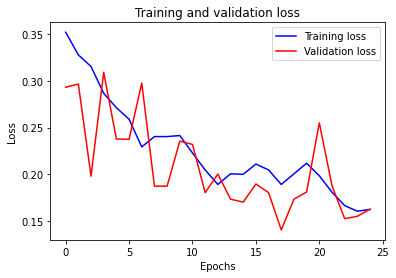

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc ="upper right")
plt.show()

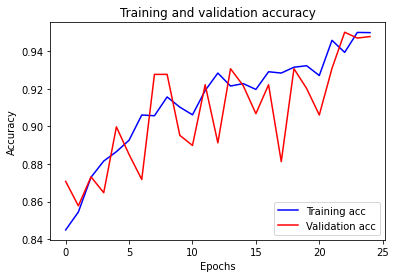

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, 'y', label='Training acc')
plt.plot(val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc ="lower right")
plt.show()

In [ ]:
from keras.models import load_model
model.save('vgg19_malaria.h5')

**Classification Report**

In [ ]:
pred_probabilities = model.predict(test_image_gen)
pred_probabilities

625/625 [==============================] - 84s 134ms/step


array([[1.6589408e-03],
       [2.1971327e-01],
       [7.4101067e-06],
       ...,
       [9.8446280e-01],
       [9.9301994e-01],
       [9.9689341e-01]], dtype=float32)

In [ ]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
predictions = pred_probabilities > 0.8

In [ ]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5000
           1       0.95      0.95      0.95      5000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
confusion_matrix(test_image_gen.classes,predictions)

array([[4760,  240],
       [ 247, 4753]])

**PREDICTIOIN**

In [ ]:
classes = {
    0 :"parasitized_cell",
    1 : "uninfected_cell"


}

In [ ]:
img2='/content/drive/MyDrive/TEST/Uninfected/C1_thinF_IMG_20150604_104722_cell_73000 (4280)4.png'

In [ ]:
custom = image.load_img(img2, target_size=(130,130,3))

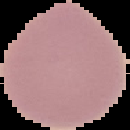

In [ ]:
custom

In [ ]:
custom_arrayformat = image.img_to_array(custom)

#adding extra dimension
custom_arrayformat = np.expand_dims(custom , axis=0)

In [ ]:
predict = model.predict(custom_arrayformat)
predict = int(predict)
classes[predict]

1/1 [==============================] - 0s 148ms/step


'uninfected_cell'

In [ ]:
img5='/content/drive/MyDrive/TEST/Parasitized/C116P77ThinF_IMG_20150930_171739_cell_92.png'

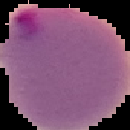

In [ ]:
custom1 = image.load_img(img5, target_size=(130,130,3))
custom1

In [ ]:
custom_arrayformat = image.img_to_array(custom1)

#adding extra dimension
custom_arrayformat = np.expand_dims(custom1 , axis=0)

In [ ]:
predict = model.predict(custom_arrayformat)
predict = int(predict)
classes[predict]

1/1 [==============================] - 0s 26ms/step


'parasitized_cell'